##### Import Necessary Libraries

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

##### Load Dataset

In [4]:
test_df = pd.read_csv('Datasets/test.csv')
train_df = pd.read_csv('Datasets/train.csv')

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Train shape: (1460, 81)
Test shape: (1459, 80)


##### Exploratory Data Analysis (EDA)

In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
sale_df_train = train_df["SalePrice"]

sale_df_train.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Sale price Visualization


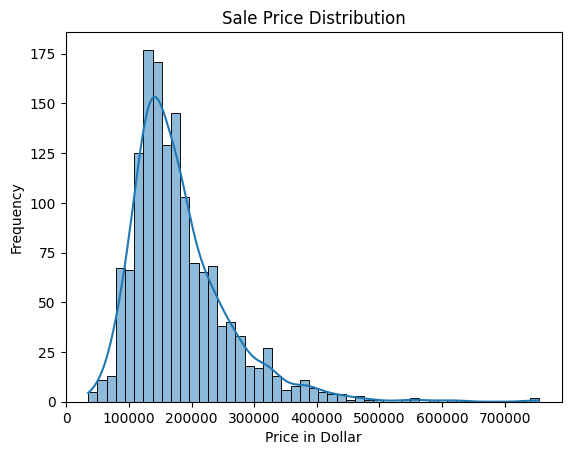


Calculating Metric Statistics
Skewness:1.882876
Kurtosis :6.536282


In [10]:
print("Sale price Visualization")
sns.histplot(sale_df_train, kde=True)
plt.title("Sale Price Distribution")
plt.xlabel("Price in Dollar")
plt.ylabel("Frequency")
plt.show()

print("\nCalculating Metric Statistics")
print("Skewness:%f" % sale_df_train.skew())
print("Kurtosis :%f" % sale_df_train.kurt())

In [12]:
missing_count = train_df.isnull().sum()

sorted_missing_count = missing_count.sort_values(ascending=False)

print("Columns list with missing value:")
print(sorted_missing_count[sorted_missing_count > 0])

Columns list with missing value:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [13]:
total_rows = train_df.shape[0]
missing_percentage = (train_df.isnull().sum() / total_rows) * 100

sort_missing_percentage = missing_percentage.sort_values(ascending=False)

print("Percentage missing value:")
print(sort_missing_percentage[sort_missing_percentage > 0])

Percentage missing value:
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


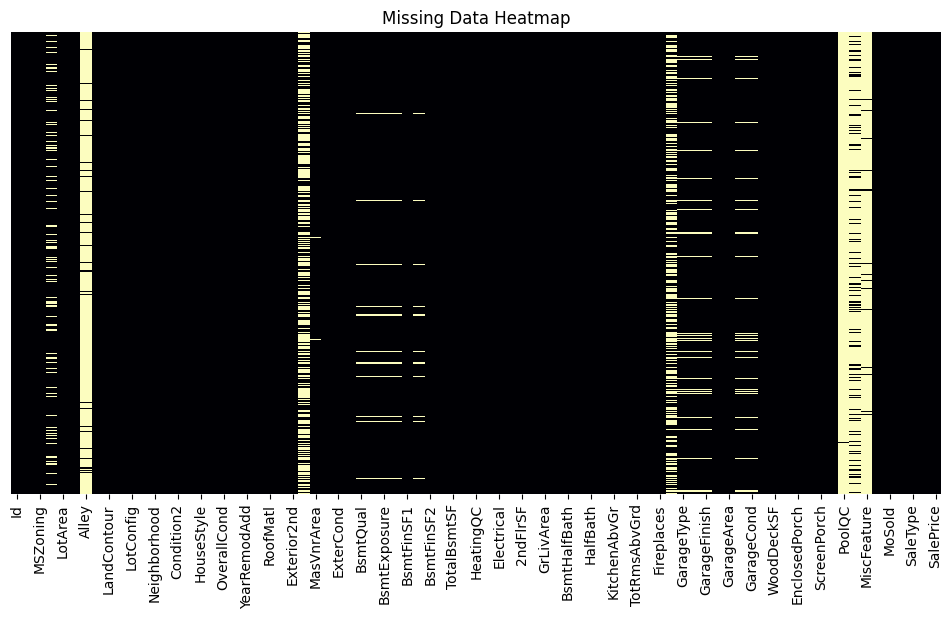

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(train_df.isnull(), cbar=False, yticklabels=False, cmap='magma')
plt.title("Missing Data Heatmap")
plt.show()

##### Data Preprocessing

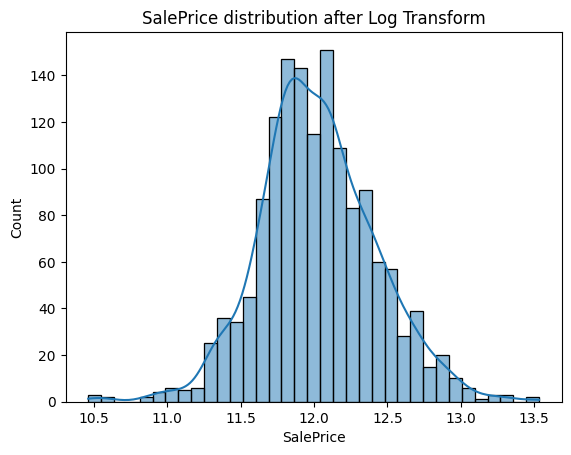


Calculating Metric Statistics
Skewness :0.121347
Kurtosis :0.809519


In [16]:
sale_df_train = np.log1p(sale_df_train)

sns.histplot(sale_df_train, kde=True)
plt.title("SalePrice distribution after Log Transform")
plt.show()

print("\nCalculating Metric Statistics")
print("Skewness :%f" % sale_df_train.skew())
print("Kurtosis :%f" % sale_df_train.kurt())

In [17]:
test_IDs = test_df["Id"]
y_train = np.log1p(train_df['SalePrice'])

train_df.drop(["Id", "SalePrice"], axis=1, inplace=True)
test_df.drop("Id", axis=1, inplace=True)

print(f"Average value of y_train after transformation: {y_train.mean():.2f}")
print("Drop Columns success")

Average value of y_train after transformation: 12.02
Drop Columns success


In [19]:
ntrain = train_df.shape[0]
print(f"Total row (ntrain) : {ntrain}")

Total row (ntrain) : 1460


In [20]:
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
print("Merge Success!\n")
print(f"Total merge data (all_data) : {all_data}")

Merge Success!

Total merge data (all_data) :       MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
2914         160       RM         21.0     1936   Pave   NaN      Reg   
2915         160       RM         21.0     1894   Pave   NaN      Reg   
2916          20       RL        160.0    20000   Pave   NaN      Reg   
2917          85       RL         62.0    10441   Pave   NaN      Reg   
2918          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence 

##### Replace 'Nan' to 'None' for categorical columns

In [21]:
cols_fill_none = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'MasVnrType'
]

for col in cols_fill_none:
    all_data[col] = all_data[col].fillna('None')


print("Successfully replaced 'NaN' to 'None'")
print(cols_fill_none)

Successfully replaced 'NaN' to 'None'
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']


##### Replace 'NaN' to '0' for numerical columns

In [23]:
cols_fill_none = [
    'GarageYrBlt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea'
]

for col in cols_fill_none:
    all_data[col] = all_data[col].fillna(0)

print("Successfully replaced 'NaN' to 0 ")
print(cols_fill_none)

Successfully replaced 'NaN' to 0 
['GarageYrBlt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']


##### Filling missing values with GroupBy Median

In [24]:
all_data["LotFrontage"] = all_data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

print("Success filling 'LotFrontage' with GroupBy Median")

Success filling 'LotFrontage' with GroupBy Median


##### Filling missing values with modus

In [25]:
cols_fill_mode = [
    'MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 
    'Exterior2nd', 'SaleType', 'Functional'
]

for col in cols_fill_mode:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

print("Success filling the column with modus")
print(cols_fill_mode)

Success filling the column with modus
['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional']


##### Verification of missing values

In [26]:
remain_missing_value = all_data.isnull().sum().sum()

print(f"Remaining missing value Total : {remain_missing_value}")

if remain_missing_value == 0:
    print("[INFO] : No missing value remaining")
else:
    print(f"[INFO] : missing value remaining {remain_missing_value}")

Remaining missing value Total : 2
[INFO] : missing value remaining 2


In [27]:
missing_again = all_data.isnull().sum()

print("Column with missing values:")
print(missing_again[missing_again > 0])

Column with missing values:
Utilities    2
dtype: int64


##### Fixing Missing Values

In [28]:
utilities_mode = all_data['Utilities'].mode()[0]

all_data['Utilities'] = all_data['Utilities'].fillna(utilities_mode)

print(f"The value used for filling is : {utilities_mode}")

The value used for filling is : AllPub


##### Repeated Validation

In [29]:
remain_missing_value = all_data.isnull().sum().sum()

print(f"Remaining missing value Total : {remain_missing_value}")

if remain_missing_value == 0:
    print("[INFO] : No missing value remaining")
else:
    print(f"[INFO] : missing value remaining {remain_missing_value}")

Remaining missing value Total : 0
[INFO] : No missing value remaining


##### Feature Engineering

In [30]:
# The age of the property when sold
all_data['HouseAge'] = all_data['YrSold'] - all_data['YearBuilt']
all_data['RemodAge'] = all_data['YrSold'] - all_data['YearRemodAdd']

# Total area
all_data['TotalSF'] = all_data['GrLivArea'] + all_data['TotalBsmtSF']

# Total bathroom
all_data['TotalBath'] = (all_data['FullBath'] + 0.5 * all_data['HalfBath'] + all_data['BsmtFullBath'] + 0.5 * all_data['BsmtHalfBath'])

# Total terrace area
all_data['TotalPorchSF'] = (all_data['OpenPorchSF'] + all_data['EnclosedPorch'] + all_data['3SsnPorch'] + all_data['ScreenPorch'])

print("New features have been successfully created!")
print(all_data[['HouseAge', 'RemodAge', 'TotalSF', 'TotalBath', 'TotalPorchSF']].head())

New features have been successfully created!
   HouseAge  RemodAge  TotalSF  TotalBath  TotalPorchSF
0         5         5   2566.0        3.5            61
1        31        31   2524.0        2.5             0
2         7         6   2706.0        3.5            42
3        91        36   2473.0        2.0           307
4         8         8   3343.0        3.5            84


##### One-hot Encoding

In [31]:
print(f"Size data before the One-Hot Encoding: {all_data.shape}")

all_data = pd.get_dummies(all_data, drop_first=True)

print(f"Size data before the One-Hot Encoding: {all_data.shape}")
all_data.head()

Size data before the One-Hot Encoding: (2919, 84)
Size data before the One-Hot Encoding: (2919, 264)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,False,False,True,False,False,False,True,False


In [33]:
X = all_data[:ntrain]
X_test = all_data[ntrain:]

y = y_train

print("Data separation complete!")
print(f"X shape (training feature): {X.shape}")
print(f"y shape (training target): {y.shape}")
print(f"X_test form (test feature): {X_test.shape}")

Data separation complete!
X shape (training feature): (1460, 264)
y shape (training target): (1460,)
X_test form (test feature): (1459, 264)


##### Modeling

In [34]:
print("Preparing the XGBoost model...")
model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

print("Starting model training... (This process may take a few seconds)")

model.fit(X, y)

print("The model has finished training!")

print("\nMaking predictions on test data...")

predictions_log = model.predict(X_test)
print("Prediction is complete.")
print(f"Examples of some prediction results (in log scale): {predictions_log[:5]}")

Preparing the XGBoost model...
Starting model training... (This process may take a few seconds)
The model has finished training!

Making predictions on test data...
Prediction is complete.
Examples of some prediction results (in log scale): [11.7586775 12.017202  12.134842  12.1606655 12.139775 ]


##### Submission File

In [36]:
print(f"Original log predictions (example): {predictions_log[:10]}")

clipped_predictions_log = np.clip(predictions_log, a_min=None, a_max=18.5)
print(f"\nClipped log predictions (example): {clipped_predictions_log[:10]}")

final_predictions = np.expm1(clipped_predictions_log)

submission = pd.DataFrame({'Id': test_IDs, 'SalePrice': final_predictions})
submission.to_csv('submission.csv', index=False)

print("\nNew submission.csv with clipped predictions has been created.")
print(f"Count of 'inf' values in final predictions: {np.isinf(final_predictions).sum()}")
print("\nFirst 5 rows of your submission file:")
submission.head()

Original log predictions (example): [11.7586775 12.017202  12.134842  12.1606655 12.139775  12.063109
 12.089396  12.037954  12.122707  11.691387 ]

Clipped log predictions (example): [11.7586775 12.017202  12.134842  12.1606655 12.139775  12.063109
 12.089396  12.037954  12.122707  11.691387 ]

New submission.csv with clipped predictions has been created.
Count of 'inf' values in final predictions: 0

First 5 rows of your submission file:


,Id,SalePrice
0,1461,127857.250000
1,1462,165577.781250
2,1463,186248.406250
3,1464,191120.671875
4,1465,187169.500000
